<a href="https://colab.research.google.com/github/Linzp828/IS6400/blob/MachineLearnning/predict_share_price_of_maotai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# predict share price of MaoTai
#### Author: Concyclics

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os
%cd './drive/MyDrive/Colab Notebooks/IS6400'
os.listdir(os.getcwd())

/content/drive/MyDrive/Colab Notebooks/IS6400


['predict-share-price-of-maotai.ipynb', 'archive.zip', 'dataset']

In [3]:
# import zipfile

# with zipfile.ZipFile('archive.zip', 'r') as zip_ref:
#     zip_ref.extractall('dataset')

## 1. Load MaoTai price

### 1.1 Load csv

In [4]:
import numpy as np
import pandas as pd

wine_ds = {}
ds_names = ['LUZHOU','WULIANG','YANGJIU','MAOTAI','SHANGXI']
for i, file in enumerate(os.listdir('./dataset')):
    data = pd.read_csv('./dataset/'+file, parse_dates=['date'])
    print("{} dataset is loaded".format(file))
    wine_ds[ds_names[i]] = data

000568.csv dataset is loaded
000858.csv dataset is loaded
002304.csv dataset is loaded
600519.csv dataset is loaded
600809.csv dataset is loaded


### 1.2 View csv

In [5]:
for d in wine_ds:
    print(d)
    data = wine_ds[d]
    print('rows:',data.shape[0])
    print('columns:',data.shape[1])

LUZHOU
rows: 6756
columns: 15
WULIANG
rows: 5782
columns: 15
YANGJIU
rows: 2992
columns: 15
MAOTAI
rows: 4974
columns: 15
SHANGXI
rows: 6842
columns: 15


In [6]:
LuZhou = wine_ds['LUZHOU']
print(LuZhou.head())
print(LuZhou.dtypes)

        date     code  name  closing price  highest price  lowest price  \
0 2022-02-28  '000568  泸州老窖         216.60         216.77        213.07   
1 2022-02-25  '000568  泸州老窖         215.30         217.00        213.00   
2 2022-02-24  '000568  泸州老窖         211.75         220.00        207.16   
3 2022-02-23  '000568  泸州老窖         222.45         222.96        219.12   
4 2022-02-22  '000568  泸州老窖         221.32         227.59        220.00   

   opening price  previous closing price change amount change rate  \
0         215.32                  215.30           1.3      0.6038   
1         214.00                  211.75          3.55      1.6765   
2         220.00                  222.45         -10.7     -4.8101   
3         221.34                  221.32          1.13      0.5106   
4         227.00                  227.69         -6.37     -2.7977   

   turnover rate    volume        amount   total value  circulation value  
0         0.2988   4376998  9.422059e+08  3.187518e+

### 1.3 preprocess dataset

In [7]:
def preprocess_ds(data, show_flag=True):
    new_data = data.copy(deep=True)
    new_data.drop('code',axis=1,inplace=True)
    new_data.drop('name',axis=1,inplace=True)
    # data['change amount'] = data['change amount'].apply(pd.to_numeric, errors='coerce').fillna(0.0)
    # data['change rate'] = data['change rate'].apply(pd.to_numeric, errors='coerce').fillna(0.0)
    new_data['change amount'] = new_data['change amount'].apply(pd.to_numeric, errors='coerce').fillna(method="ffill")
    new_data['change rate'] = new_data['change rate'].apply(pd.to_numeric, errors='coerce').fillna(method="ffill")
    new_data['volume'] = new_data['volume'].astype(float)
    new_data['date'] = pd.to_datetime(new_data['date'])
    new_data = new_data.sort_values(by='date')
    if show_flag:
        print(new_data.dtypes)
        print(new_data.head())
    return new_data

In [8]:
new_wines = {}
for i in wine_ds:
    new_wines[i] = preprocess_ds(wine_ds[i], show_flag=False)

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# cm = sns.light_palette("red", as_cmap=True)
# MaoTai_ds.tail().style.background_gradient(cmap=cm)

## 2. Visualize the share

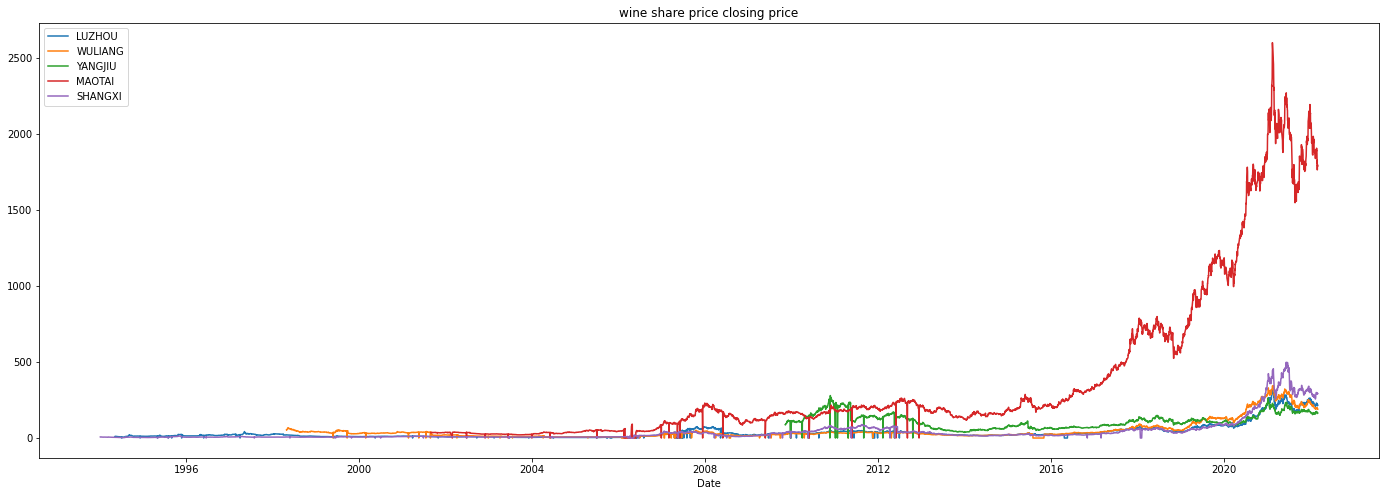

In [10]:
plt.figure(figsize=(24,8))
plt.title("wine share price closing price")
plt.xlabel("Date")
for i in new_wines:
    plt.plot(new_wines[i]['date'], new_wines[i]['closing price'], label=i)
    plt.legend()
plt.show()

我们可以看到茅台的股价从2016年起有明显的上升趋势，因此决定对2016年之后的数据进行探索

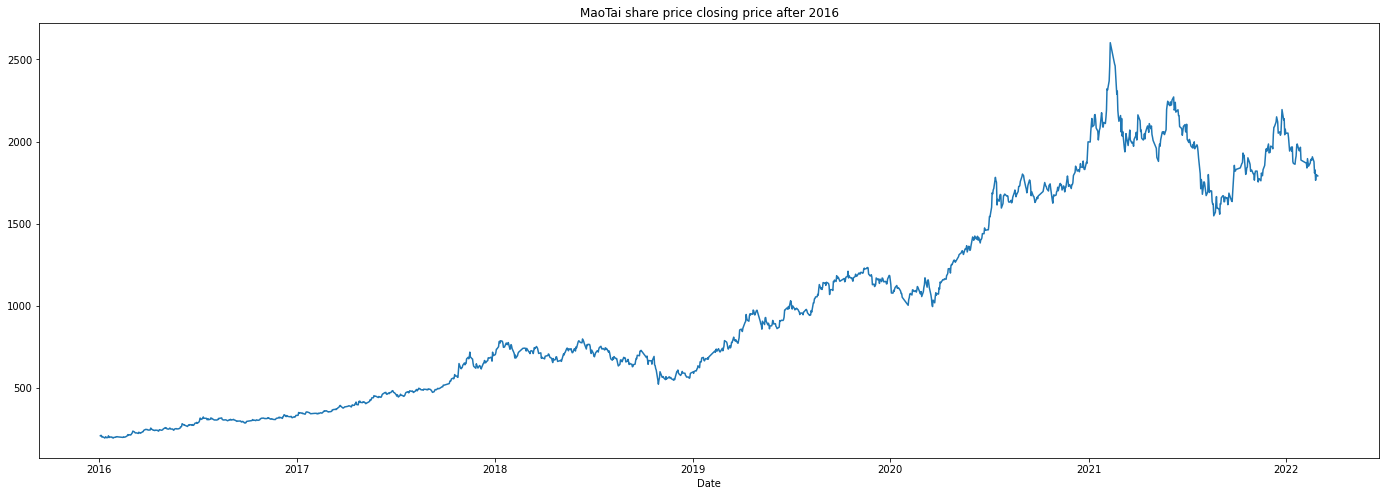

In [15]:
maotai = new_wines['MAOTAI'].copy(deep=True)
maotai2016 = maotai[maotai['date'].dt.year >= 2016]
plt.figure(figsize=(24,8))
plt.title("MaoTai share price closing price after 2016")
plt.xlabel("Date")
plt.plot(maotai2016['date'], maotai2016['closing price'])

In [21]:
def plot_wine(name, year):
    new_d = new_wines[name].copy(deep=True)
    new_d = new_d[new_d['date'].dt.year >= year]
    plt.figure(figsize=(24,8))
    plt.title(name+" share price closing price after "+ str(year))
    plt.xlabel("Date")
    plt.plot(new_d['date'], new_d['closing price'])

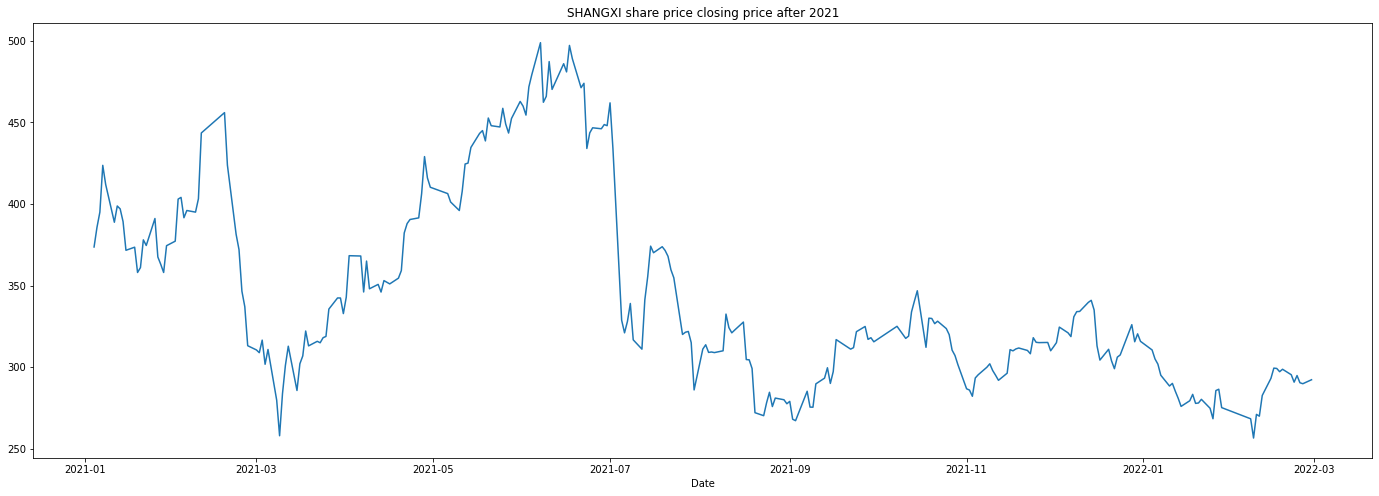

In [23]:
plot_wine('SHANGXI', 2021)

## 3. Train and test split

## 3. Predict with LSTM model

### 3.1 parsing the data

We predict the change rate and finally use change rate to calculate the price each day.

In [ ]:
predict_col=0

In [ ]:
price = np.zeros((len(MaoTai_ds),))
raw_data = np.zeros((len(MaoTai_ds), len(MaoTai_ds.columns)))
i = 0
for index, row in MaoTai_ds.iterrows():
    values = [np.float64(x) for x in row]
    price[i] = values[predict_col]
    raw_data[i,:] = values[:]
    i+=1

In [ ]:
validation_split=0.2
num_val_samples = int(validation_split * len(raw_data))
num_train_samples = len(raw_data) - num_val_samples
print("num_train_samples:", num_train_samples)
print("num_val_samples:", num_val_samples)

num_train_samples: 3980
num_val_samples: 994


### 3.2 normalize the data

In [ ]:
#mean = raw_data[:num_train_samples].mean(axis=0)
#raw_data -= mean
#std = raw_data[:num_train_samples].std(axis=0)
#raw_data /= std



### 3.3 get tensor dataset

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import layers

sampling_rate = 90
sequence_length = 1
delay = sampling_rate * (sequence_length)
batch_size = 256

train_dataset = keras.preprocessing.timeseries_dataset_from_array(
    raw_data[:-delay],
    targets=price[delay:],
    sampling_rate=sampling_rate,
    sequence_length=sequence_length,
    shuffle=True,
    batch_size=batch_size,
    start_index=0,
    end_index=num_train_samples)

val_dataset = keras.preprocessing.timeseries_dataset_from_array(
    raw_data[:-delay],
    targets=price[delay:],
    sampling_rate=sampling_rate,
    sequence_length=sequence_length,
    shuffle=True,
    batch_size=batch_size,
    start_index=num_train_samples)

2022-03-09 07:52:55.273948: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-09 07:52:55.359914: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-09 07:52:55.360779: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-09 07:52:55.363073: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

### 3.2 Computing the common-sense baseline MAE

In [ ]:
def evaluate_naive_method(dataset):
    total_abs_err = 0.
    samples_seen = 0
    for samples, targets in dataset:
        preds = samples[:, -1, 1]#*std[predict_col]+mean[predict_col]
        total_abs_err += np.sum(np.abs(preds - targets))
        samples_seen += samples.shape[0]
    return total_abs_err / samples_seen

print(f"Validation MAE: {evaluate_naive_method(val_dataset):.2f}")

Validation MAE: 216.42


2022-03-09 07:52:57.786395: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


### 3.3 construct the RNN model

In [ ]:
#callback
callbacks = [
    keras.callbacks.ModelCheckpoint(
        "MaoTaiPredict.keras",
        save_best_only=True,
        monitor="val_loss"),
]

In [ ]:
#model
inputs = keras.Input(shape=(sequence_length, raw_data.shape[-1]))
x = layers.BatchNormalization()(inputs)
x = layers.Bidirectional(layers.LSTM(1024, recurrent_dropout=0.5, return_sequences=True))(x)
#x = layers.LSTM(256, recurrent_dropout=0.5, return_sequences=True)(x)
outputs = layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.01), loss="mse", metrics=["mae"])

In [ ]:
history = model.fit(train_dataset,
                    epochs=1000,
                    validation_data=val_dataset,
                    callbacks=callbacks)

model = keras.models.load_model("MaoTaiPredict.keras")
print(f"Test MAE: {model.evaluate(val_dataset)[1]:.2f}")

Epoch 1/1000
16/16 [==============================] - 6s 69ms/step - loss: 18132.5371 - mae: 101.6267 - val_loss: 1120798.5000 - val_mae: 925.9947
Epoch 2/1000
16/16 [==============================] - 1s 45ms/step - loss: 4124.1279 - mae: 42.8113 - val_loss: 1097842.3750 - val_mae: 912.7728
Epoch 3/1000
16/16 [==============================] - 1s 42ms/step - loss: 3017.2539 - mae: 35.8772 - val_loss: 923932.6875 - val_mae: 812.6774
Epoch 4/1000
16/16 [==============================] - 1s 45ms/step - loss: 2385.3452 - mae: 32.3286 - val_loss: 944947.0625 - val_mae: 825.0620
Epoch 5/1000
16/16 [==============================] - 1s 43ms/step - loss: 2223.5864 - mae: 30.7805 - val_loss: 781583.0625 - val_mae: 721.6319
Epoch 6/1000
16/16 [==============================] - 1s 47ms/step - loss: 1681.0031 - mae: 27.7566 - val_loss: 722754.7500 - val_mae: 685.1893
Epoch 7/1000
16/16 [==============================] - 1s 44ms/step - loss: 1598.4263 - mae: 27.5157 - val_loss: 685035.1875 - val_ma

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
def plot_history(history,title=''):  
    if title!='':
        title+=' '
    #Ploting the Loss and Accuracy Curves
    fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (32,9))
    #Loss
    sns.lineplot(data = history.history['loss'], label = 'Training Loss', ax = ax[0])
    sns.lineplot(data = history.history['val_loss'], label = 'Validation Loss', ax = ax[0])
    ax[0].legend(loc = 'upper right')
    ax[0].set_title(title+'Loss')
    #Accuracy
    sns.lineplot(data = history.history['mae'], label = 'Training MAE', ax = ax[1])
    sns.lineplot(data = history.history['val_mae'], label = 'Validation MAE', ax = ax[1])
    ax[1].legend(loc = 'lower right')
    ax[1].set_title(title+'MAE')

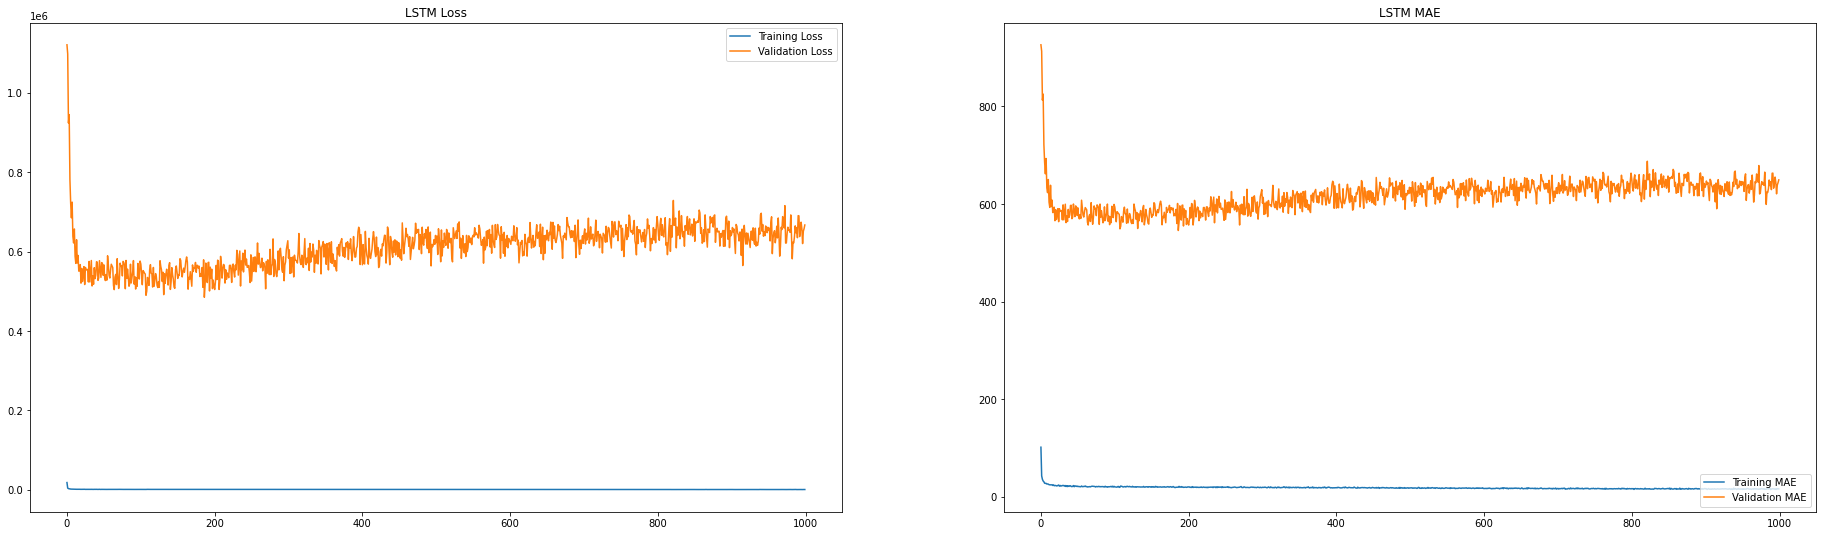

In [ ]:
plot_history(history,'LSTM')

In [ ]:
vals = model.predict(val_dataset)